# Get dataset

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
project_path = '/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1'
in_dataset_path = '{}/in/faces'.format(project_path)
%cd '/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1'

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1


In [ ]:
# Check the current path
!pwd

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1


In [ ]:

def get_dataset_urls_dictionary():  
  datasetURLTempleteStr = "http://vcipl-okstate.org/pbvs/bench/Data/04/face{}.zip"

  datasetURLs = {}
  for i in range(1,21):
    if i != 5 and i != 6:
      if i < 10:
        datasetNumberStr =  "0"+ str(i)
      else:
        datasetNumberStr = str(i)
      datasetURLs[datasetNumberStr] = datasetURLTempleteStr.format(datasetNumberStr)

  return datasetURLs

In [ ]:
datasetDictionary = get_dataset_urls_dictionary()
datasetDictionary

{'01': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face01.zip',
 '02': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face02.zip',
 '03': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face03.zip',
 '04': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face04.zip',
 '07': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face07.zip',
 '08': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face08.zip',
 '09': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face09.zip',
 '10': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face10.zip',
 '11': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face11.zip',
 '12': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face12.zip',
 '13': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face13.zip',
 '14': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face14.zip',
 '15': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face15.zip',
 '16': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face16.zip',
 '17': 'http://vcipl-okstate.org/pbvs/bench/Data/04/face17.zip',
 '18': 'http://vcipl-okst

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download and unzip datasets

In [ ]:
import requests
import os
def downloadFile(file_url, path):
  r = requests.get(file_url, stream = True)
  
  with open(path, "wb") as file:
      for block in r.iter_content(chunk_size = 1024):
          if block:
              file.write(block)
  

In [ ]:
import zipfile
def unzip_files(zip_file, unzip_path):
  with zipfile.ZipFile(zip_file,"r") as zip_ref:
    zip_ref.extractall(unzip_path)

In [ ]:

def create_in_folder(project_path):
  %pwd
  try:
    os.mkdir("in")
  except:
    print("In already exists");

  os.chdir("{}/in".format(project_path))
  %pwd
  try:
    os.mkdir("faces")
  except:
    print("faces already exists");
  %pwd
  os.chdir(project_path)

In [ ]:

def download_dataset_from_dictionary(dictionary, project_path):
  zip_files = {} 
  for datasetNumber, datasetURL in dictionary.items():
    zip_name = "faces{}".format(datasetNumber)
    zip_path = "{}/in/faces/{}".format(project_path, zip_name)
    zip_files[zip_name] = zip_path
    downloadFile(datasetURL, zip_path+".zip")

  return zip_files
    


In [ ]:
!pwd
create_in_folder(project_path)

In [ ]:
downloaded_files = download_dataset_from_dictionary(datasetDictionary, project_path)
downloaded_files

In [ ]:
for zip_name, zip_path in downloaded_files.items():
  unzip_files("{}.zip".format(zip_path), in_dataset_path)

## Load images to memory

In [ ]:
import numpy as np
from tensorflow import keras

def create_images_dataframe(images_path, tag):
    items = [];
    
    for image_path in images_path:
      image = keras.preprocessing.image.load_img(
          image_path, color_mode='grayscale', target_size=(320, 320),
          interpolation='nearest'
      )

      image = keras.preprocessing.image.img_to_array(image)
      image = np.reshape(image, (320, 320))
      item = [(image, tag)]
      items = items + item

    return items

In [ ]:
import pathlib
def get_faces_dataset_images_from_folders(folders_dataset):
  data_dir = pathlib.Path(in_dataset_path)
  dataset_paths = {}
  substraction_for_empty_dataset = 1
  for folder in folders_dataset:
    ds_number = int(folder.replace("face", ""))
    if ds_number == 7:
      substraction_for_empty_dataset += 2
    dataset_tag = ds_number - substraction_for_empty_dataset
    images_paths = sorted(list(data_dir.glob(folder + '/*')))
    # Take just first 73 images
    dataset_paths[folder] = create_images_dataframe(images_paths[:73], dataset_tag)

  return dataset_paths

In [ ]:
folder_names = [ 'face{}'.format(dataset_number) for dataset_number, _ in datasetDictionary.items() ]
folder_names

['face01',
 'face02',
 'face03',
 'face04',
 'face07',
 'face08',
 'face09',
 'face10',
 'face11',
 'face12',
 'face13',
 'face14',
 'face15',
 'face16',
 'face17',
 'face18',
 'face19',
 'face20']

In [ ]:
data_dir = pathlib.Path(in_dataset_path)
images_paths = sorted(list(data_dir.glob('face20/*')))
images_paths

[PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0001.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0002.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0003.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0004.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0005.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0006.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0007.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0008.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R1/in/faces/face20/0009.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/AI lab schoo

In [ ]:
dataset_paths = get_faces_dataset_images_from_folders(folder_names)
dataset_paths

{'face01': [(array([[  0.,   0.,   0., ...,   0.,   0.,   1.],
          [  1.,   1.,   1., ...,   9.,  11.,  13.],
          [  1.,   1.,   1., ...,   9.,  11.,  13.],
          ...,
          [ 42.,  44.,  24., ...,  56.,  79.,  84.],
          [ 42.,  44.,  24., ...,  56.,  79.,  84.],
          [139., 155., 152., ...,  76.,  80.,  73.]], dtype=float32), 0),
  (array([[  0.,   0.,   0., ...,   1.,   1.,   1.],
          [  0.,   0.,   0., ...,   7.,   8.,   8.],
          [  0.,   0.,   0., ...,   7.,   8.,   8.],
          ...,
          [ 38.,  39.,  19., ...,  53.,  65.,  63.],
          [ 38.,  39.,  19., ...,  53.,  65.,  63.],
          [142., 156., 151., ...,  81.,  78.,  63.]], dtype=float32), 0),
  (array([[  2.,   1.,   0., ...,   2.,   1.,   0.],
          [  4.,   3.,   2., ...,   9.,   9.,   9.],
          [  4.,   3.,   2., ...,   9.,   9.,   9.],
          ...,
          [  0.,   7.,   8., ...,  72.,  93.,  86.],
          [  0.,   7.,   8., ...,  72.,  93.,  86.],
  

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

def visualize_dataset(dataset_paths, reverse=False):
  for faces_name, faces_dataset in dataset_paths.items():
    row = 0
    plt.figure(figsize=(10, 10))
    for image in faces_dataset[:5] if not reverse else faces_dataset[68:]: 
      plt.subplot(6,5,row+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid('off')
      plt.imshow(image[0], cmap="gray")
      row += 1
    
    

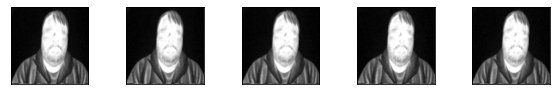

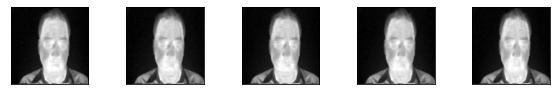

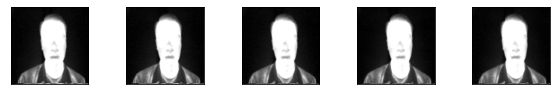

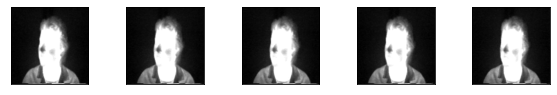

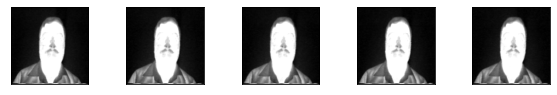

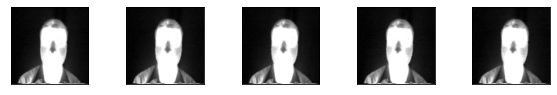

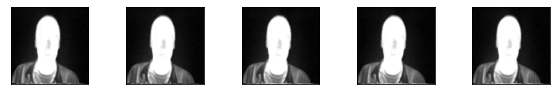

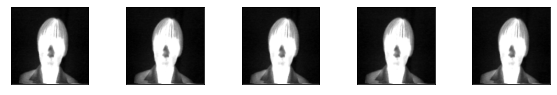

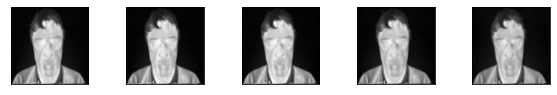

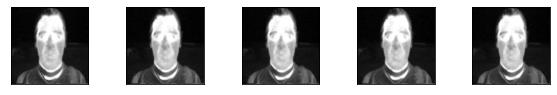

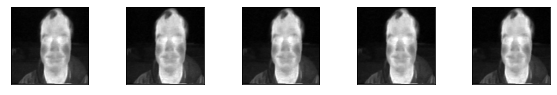

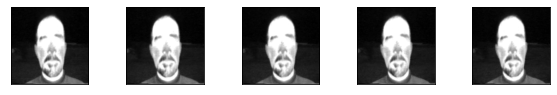

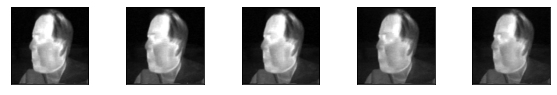

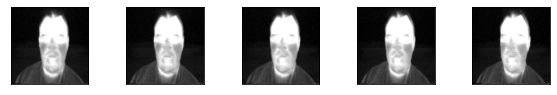

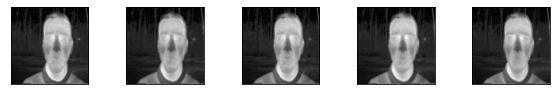

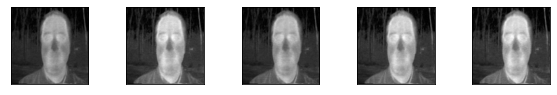

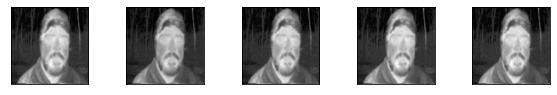

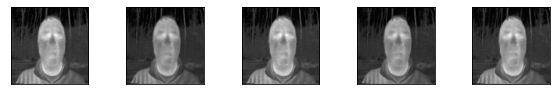

In [ ]:
visualize_dataset(dataset_paths)

# Generate model

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    

In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(320, 320)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation=tf.nn.relu))
  model.add(layers.Dropout(.20))
  model.add(layers.Dense(16, activation=tf.nn.relu))
  model.add(layers.Dense(18, activation=tf.nn.softmax))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_metric, precision_metric, recall_metric])
  return model

In [ ]:
def create_conv_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(16, 5, activation=tf.nn.relu, padding="same", input_shape=(320, 320, 1)))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation=tf.nn.relu))
  model.add(layers.Dense(18, activation=tf.nn.softmax))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_metric, precision_metric, recall_metric])
  return model

In [ ]:
model = create_model()

In [ ]:
conv_model = create_conv_model()

# Train model

In [ ]:
import random
def get_x_y_shuffled_dataset(dataset_dict):
  dataset = []
  for faces_name, faces_dataset in dataset_dict.items():
    dataset += faces_dataset
  random.shuffle(dataset)
  X = [i[0] for i in dataset] 
  y = [i[1] for i in dataset] 
  return (X, y)

In [ ]:

def test_train_validation_dataset():
  X, y = get_x_y_shuffled_dataset(dataset_paths)
  print("X len", len(X))
  print("y len", len(y))

  train_70_percent = round(len(X) * 0.7)
  validation_20_percent = round(len(X) * 0.2)
  X_train, X_test, y_train, y_test = X[:train_70_percent], X[train_70_percent:], y[:train_70_percent], y[train_70_percent:]
  X_validation, X_test, y_validation, y_test = X_test[:validation_20_percent], X_test[validation_20_percent:], y_test[:validation_20_percent], y_test[validation_20_percent:]


  X_train = np.asarray(X_train)
  X_test = np.asarray(X_test)
  X_validation = np.asarray(X_validation)
  y_train = np.asarray(y_train)
  y_test = np.asarray(y_test)
  y_validation = np.asarray(y_validation)

  return (X_train, X_test, X_validation, y_train, y_test, y_validation)

In [ ]:
X_train, X_test, X_validation, y_train, y_test, y_validation = test_train_validation_dataset()

X len 1314
y len 1314


In [ ]:
print(len(X_train))
print(len(y_train))

920
920


In [ ]:
X_train.shape

(920, 320, 320)

In [ ]:
y_train.shape

(920,)

In [ ]:
def train_model(model, model_name, epochs=5):
  filepath =  "out/{}.h5".format(model_name)
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
  history = model.fit(X_train, y_train, epochs=epochs, callbacks=[checkpoint_callback])
  return history

In [ ]:
history = train_model(model, model_name="dense")

Epoch 1/5
25/29 [========================>.....] - ETA: 0s - loss: 9.9121 - accuracy: 0.4688 - f1_metric: 1.5941 - precision_metric: 62400000.0000 - recall_metric: 1.4171 
Epoch 1: accuracy improved from -inf to 0.49891, saving model to out/dense.hdf5
29/29 [==============================] - 1s 18ms/step - loss: 9.3070 - accuracy: 0.4989 - f1_metric: 1.5398 - precision_metric: 53793104.0000 - recall_metric: 1.3893
Epoch 2/5
25/29 [========================>.....] - ETA: 0s - loss: 2.6564 - accuracy: 0.7600 - f1_metric: 1.2324 - precision_metric: 1.2158 - recall_metric: 1.2513
Epoch 2: accuracy improved from 0.49891 to 0.76304, saving model to out/dense.hdf5
29/29 [==============================] - 1s 17ms/step - loss: 2.6704 - accuracy: 0.7630 - f1_metric: 1.2237 - precision_metric: 1.2068 - recall_metric: 1.2427
Epoch 3/5
26/29 [=========================>....] - ETA: 0s - loss: 1.9506 - accuracy: 0.8413 - f1_metric: 1.2550 - precision_metric: 1.2421 - recall_metric: 1.2707
Epoch 3: acc

In [ ]:
conv_history = train_model(conv_model, model_name="conv")

Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: 3.1758 - accuracy: 0.8837 - f1_metric: 1.3771 - precision_metric: 7.7823 - recall_metric: 1.2005
Epoch 1: accuracy improved from -inf to 0.88370, saving model to out/conv.hdf5
29/29 [==============================] - 3s 71ms/step - loss: 3.1758 - accuracy: 0.8837 - f1_metric: 1.3771 - precision_metric: 7.7823 - recall_metric: 1.2005
Epoch 2/5
28/29 [===========================>..] - ETA: 0s - loss: 0.1871 - accuracy: 0.9888 - f1_metric: 0.9737 - precision_metric: 0.9453 - recall_metric: 1.0047
Epoch 2: accuracy improved from 0.88370 to 0.98913, saving model to out/conv.hdf5
29/29 [==============================] - 2s 66ms/step - loss: 0.1822 - accuracy: 0.9891 - f1_metric: 0.9738 - precision_metric: 0.9458 - recall_metric: 1.0045
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9946 - f1_metric: 0.9705 - precision_metric: 0.9422 - recall_metric: 1.0011
Epoch 3: accuracy improved fr

# Validate Model

In [ ]:
def plot_history(history):
  loss_values = history.history['loss']

  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['accuracy'], label='Accuracy')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def test_validate_model(model):
  test_loss, test_acc, test_f1_score, test_precision, test_recall = model.evaluate(X_test, y_test)
  print("Accuracy: ", test_acc)
  print("F1 score: ", test_f1_score)

  predictions = model.predict(X_validation)

  labels = ["Face01", "Face02", "Face03", "Face04", "Face07", "Face08", "Face09", "Face10", "Face11", "Face12", "Face13", "Face14", "Face15", "Face16", "Face17", "Face18", "Face19", "Face30"]

  cm = confusion_matrix([item for item in y_validation], [np.argmax(prediction) for prediction in predictions])

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

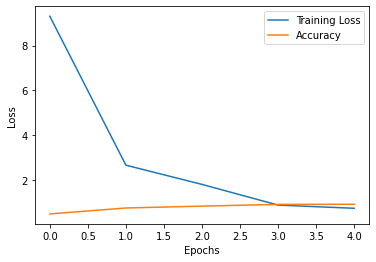

In [ ]:
plot_history(history)

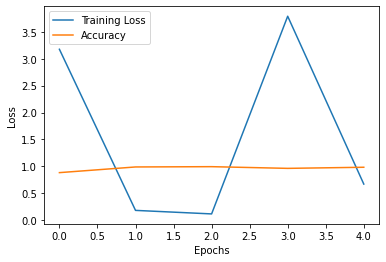

In [ ]:
plot_history(conv_history)

5/5 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.9008 - f1_metric: 1.4863 - precision_metric: 1.4888 - recall_metric: 1.4845
Accuracy:  0.9007633328437805
F1 score:  1.4862861633300781


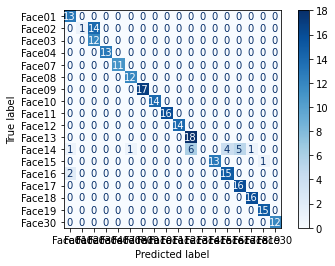

In [ ]:
test_validate_model(model)

5/5 [==============================] - 0s 20ms/step - loss: 212.0741 - accuracy: 0.4046 - f1_metric: 1.0128 - precision_metric: 0.9937 - recall_metric: 1.0329
Accuracy:  0.40458014607429504
F1 score:  1.0128008127212524


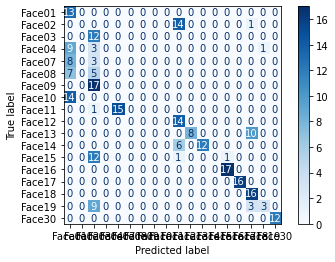

In [ ]:
test_validate_model(conv_model)